In [4]:
import pandas as pd
import pandas_datareader.data as web
from datetime import datetime
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = 'all' #默认为'last'
import matplotlib.pyplot as plt
plt.rcParams['font.family']=['HYQuanTangShiJ']
import mplfinance as mpf
%matplotlib inline

<div class="jumbotron">
    <p class="display-1 h1"><font face="Source Han Serif CN SemiBold">量化投资与交易<font></p>
    <hr class="my-4">
    <p>主讲：李岩</p>
    <p>管理学院</p>
    <p>liyan@cumtb.edu.cn</p>
</div>

# 什么是量化交易？

## 量化交易的定义

<dl class="row text-info">
    <dt class="col-md-4">量化</dt>
    <dd class="col-md-8">将抽象的逻辑关系用<strong>数学方式</strong>表达出来</dd>
<dl>

<dl class="row text-danger">
    <dt class="col-md-4"><span class="text-muted">(金融)</span>交易</dt>
    <dd class="col-md-8">根据投资决策创立或者改变投资组合头寸的证券交易</dd>
<dl>

- 头寸(position)：持有的特定商品、证券、货币等的数量

<dl class="row">
    <dt class="col-md-4">量化交易</dt>
    <dd class="col-md-8">运用数学模型(统计学、机器学习等)对历史数据进行量化分析以开发交易策略，利用计算机按照交易策略执行交易决策</dd>
<dl>

- 数学模型：统计模型(回归模型、时间序列分析等)、机器学习(分类模型、聚类模型、文本挖掘等)

- 计算机技术：编程语言(Python、C++等)、数据存储技术(mysql、MongoDB、hdf5等)

## 主观交易

<dl class="row">
    <dt class="col-md-4">主观交易</dt>
    <dd class="col-md-8">投资者利用主观判断做出投资决策</dd>
<dl>

### 主观判断从哪儿来？

- 历史K线图

In [33]:
stockdf = web.DataReader('600519.SS','yahoo',start='2019-1-1',end='2020-11-11')
stockdf

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,612.000000,595.010010,609.979980,598.979980,6228649.0,583.424377
2019-01-03,601.659973,585.799988,599.969971,590.000000,3097735.0,574.677612
2019-01-04,607.669983,582.020020,587.280029,602.000000,3768347.0,586.366028
2019-01-07,610.299988,602.219971,587.280029,605.489990,3475013.0,589.765381
2019-01-08,612.000000,600.280029,605.500000,604.789978,2883813.0,589.083496
...,...,...,...,...,...,...
2020-11-04,1704.000000,1685.000000,1700.000000,1699.579956,1644371.0,1699.579956
2020-11-05,1732.479980,1712.099976,1717.000000,1721.900024,2352414.0,1721.900024
2020-11-06,1731.589966,1690.000000,1730.550049,1700.619995,2305153.0,1700.619995


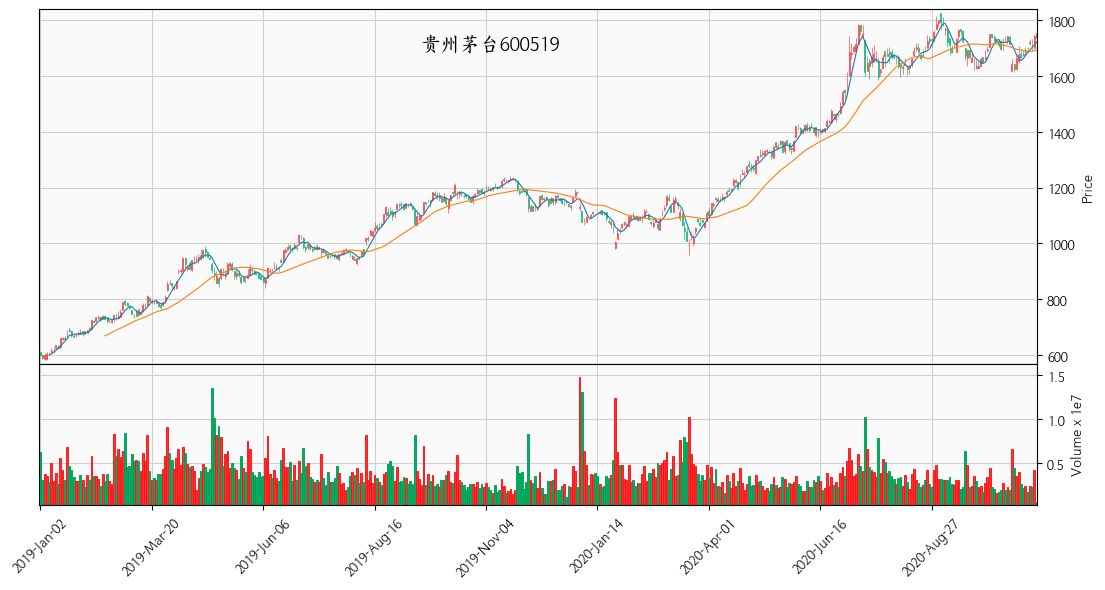

In [43]:
mc = mpf.make_marketcolors(up='#fe3032', down='#00b060', inherit=True)
sty = mpf.make_mpf_style(base_mpf_style='yahoo',marketcolors=mc,rc={'font.family':'HYQuanTangShiJ'})
mpf.plot(stockdf,type='candle',style=sty,volume=True,figratio=(12,6),figscale=1,title='贵州茅台600519',tight_layout=True,mav=(5,30))

### 主观判断从哪儿来？<span class="text-muted">(续)</span>

- 国际环境、财经新闻

<center><img src="./img/introduction/news.jpg" width=100%></center>

- 券商的研究报告

<center>
    <div class="row">
        <div class="col-md-6">
            <img src="./img/introduction/instRep20190.jpg" width=60%>
        </div>
        <div class="col-md-6">
            <img src="./img/introduction/instRep2019.jpg" width=60%>
        </div>
    </div>
</center>

- 公司的财务报告

<center><img src="./img/introduction/financialReport.jpg" width=100%></center>

### 主观判断从哪儿来？<span class="text-muted">(续)</span>

- 著名人物的演讲

<center><img src="./img/introduction/people.jpg" width=100%></center>

- 论坛、朋友圈等社交媒体

<center><img src="./img/introduction/snowBall.png" width=50%></center>

- 小道消息

<center><img src="./img/introduction/rumor.png" width=100%></center>

### 交易员

<dl class="row">
    <dt class="col-md-4">交易员(trader)</dt>
    <dd class="col-md-8">
        <p>在金融市场从事金融资产买卖的个体</p>
        <p>可以代表自己、他人，或者机构交易</p>
    </dd>
<dl>

> 优秀的交易员是银行、证券公司（投资银行）、上市公司、基金、专业交易公司最舍得花重金招募的人才

<center><img src="./img/introduction/goldmansachs.png" width=100%></center>

##### 优秀的交易员

- 交易员应当具有的素质
     - 果断
     - 谨慎
     - 耐得住寂寞
     - 能够一定程度上克服人类固有的有限理性(bounded rationality)

##### 典型的有限理性

###### 前景理论(prospect theory)

<center><img src="./img/introduction/prospecttest.jpeg" width=100%></center>

<center><img src="./img/introduction/prospect-theory.jpg" width=100%></center>

- 大多数人在面临**获利**的时候是风险**规避**的

- 大多数人在面临**损失**的时候是风险**偏好**的

- 大多数人在损失的时候比盈利的时候更愿意承受风险，愿意承受较长时间的损失和较短时间的盈利

###### 后见之明（Hindsight Bias）

- 当某个事件发生后，即使该事件是我们之前不能预测的，我们也觉得该事件是可以被预测到的

<center><img src="./img/introduction/hindsight.jfif" width=50%></center>

###### 过度自信(overconfidence)

<center><img src="./img/introduction/overconfidence.png" width=40%></center>

- 高估自己的技术、能力，认为真实的自己比现在的自己要好

- 表现
    - 高于平均水平(better than average)
    - 一切尽在掌控(illusion of control)
    - 乐观的时间估计(timing optimism)：高估自己能在限定时间内完成任务，却低估任务需要花费的真实时间
    - 需求效应(desirability effect)：高估自己希望发生的结果的出现概率

###### 代表性法则(representativeness heuristic)

<center><img src="./img/introduction/represent.png" width=50%></center>

- 基于面对的情况与我们头脑中的原型(prototype)之间的相似程度做出决策

###### 羊群效应(herding mentality)

- 跟随或者复制他人的做法

- 原因：与大众相反在情感上和心理上都会不舒服

###### 锚定效应(anchoring effects)

<center><img src="./img/introduction/anchoring.jfif" width=50%></center>

- 当需要对某个事件做定量估计时，会将某些**特定数值**作为起始值，起始值像锚一样**制约**着估计值。在做决策的时候，会不自觉地给予**最初**获得的信息过多的重视

##### 著名交易员

<ul class="list-inline">
    <li class="list-inline-item display-1"><strong>乔治·索罗斯(George Soros)</strong></li>
</ul>

<center><img src="./img/introduction/Soros.jpg" width=50%></center>

<ul class="list-inline">
    <li class="list-inline-item"><strong>做空英镑</strong></li>
</ul>

- 机会：英国要加入欧洲汇率机制，紧盯德国马克，施行固定汇率制，但是英国经济疲软

- 用100亿美元做空英镑，盈利至少10亿美元，迫使英国退出欧洲汇率机制

In [61]:
gbp = web.DataReader('DEXUSUK','fred',start='1992-1-1',end='1992-12-31')
gbp

,DEXUSUK
DATE,
1992-01-01,NaN
1992-01-02,1.8680
1992-01-03,1.8450
1992-01-06,1.8770
1992-01-07,1.8710
...,...
1992-12-25,NaN
1992-12-28,1.5115
1992-12-29,1.5125


In [69]:
gbpOhlc = gbp.resample('B').ohlc()
gbpOhlc.columns = gbpOhlc.columns.get_level_values(1)
gbpOhlc

,open,high,low,close
DATE,,,,
1992-01-01,NaN,NaN,NaN,NaN
1992-01-02,1.8680,1.8680,1.8680,1.8680
1992-01-03,1.8450,1.8450,1.8450,1.8450
1992-01-06,1.8770,1.8770,1.8770,1.8770
1992-01-07,1.8710,1.8710,1.8710,1.8710
...,...,...,...,...
1992-12-25,NaN,NaN,NaN,NaN
1992-12-28,1.5115,1.5115,1.5115,1.5115
1992-12-29,1.5125,1.5125,1.5125,1.5125


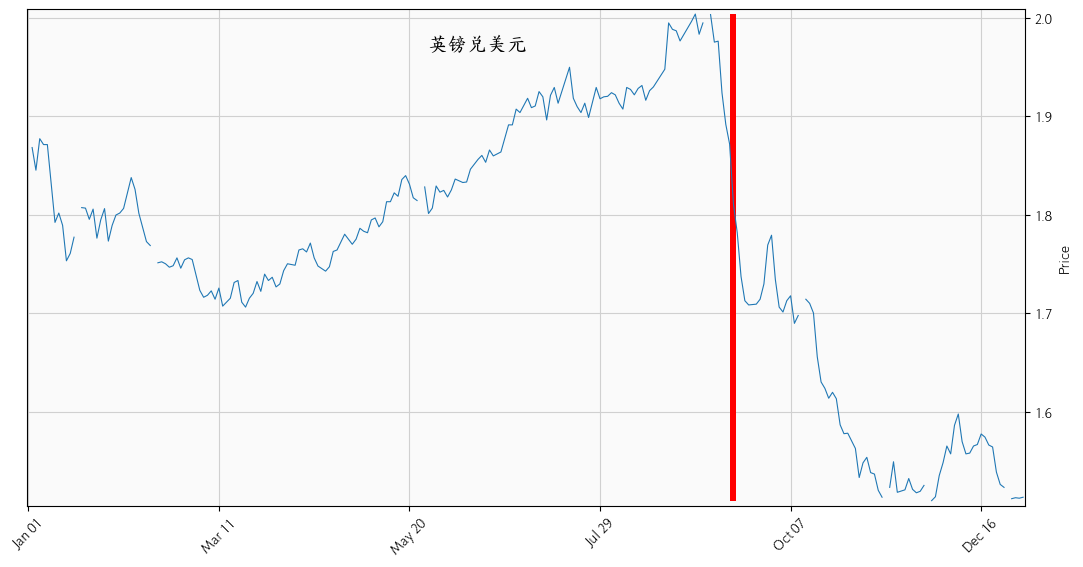

In [75]:
mc = mpf.make_mpf_style(base_mpf_style='yahoo',rc={'font.family':'HYQuanTangShiJ'})
mpf.plot(gbpOhlc,type='line',style=mc,figratio=(12,6),figscale=1,tight_layout=True,title='英镑兑美元',vlines={'vlines':'1992-9-16','linewidths':3,'colors':'r'})

<center><img src="./img/introduction/poundBkWed.jpg" width=60%></center>

<ul class="list-inline">
    <li class="list-inline-item display-1"><strong>约翰·保尔森(John Paulson)</strong></li>
</ul>

<center><img src="./img/introduction/Paulson.jpg" width=40%></center>

<ul class="list-inline">
    <li class="list-inline-item"><strong>做空次贷</strong></li>
</ul>

- 机会：房地产市场显得泡沫巨大，房价上涨过快，确信不动产市场被高估

- 盈利150亿美元

<ul class="list-inline">
    <li class="list-inline-item display-1"><strong>约翰·保尔森(John Paulson)</strong></li>
</ul>

- 在金矿的ETF中建立多头头寸

<center><img src="./img/introduction/gold-chart-init.jpg" width=20%></center> 

<center><img src="./img/introduction/gold-chart-top.jpg" width=20%></center>

- 2011年达到最大值，\$63/share

<center><img src="./img/introduction/gold-chart-down.jpg" width=50%></center>

<center><img src="./img/introduction/gold-chart.png" width=80%></center>

- 2011年投入380亿美元

- 当前只剩余90亿美元

##### 失败的交易员

<ul class="list-inline">
    <li class="list-inline-item display-1"><strong>陈久霖</strong></li>
</ul>

<center><img src="./img/introduction/chenjiulin.jpg" width=50%></center>

- 从事石油衍生品期权交易，赌石油价格回落，事实却是石油价格一路飙升

- 亏损5.54亿美元

- 失败原因：逆势交易，没有设定止损

<ul class="list-inline">
    <li class="list-inline-item display-1"><strong>中国银行“原油宝”事件</strong></li>
</ul>

- 出现<mark>负</mark>油价

<center><img src="./img/introduction/wtioil.png" width=80%></center>

<center><img src="./img/introduction/yuanyoubao.jpeg" width=50%></center>

- 亏算原因：中行未及时移仓换月

<center><img src="./img/introduction/yuanyoubaobill.jpeg" width=30%></center>

## 量化交易的特点

- 方法科学，建立在数学模型与大规模数据回测实验基础之上

- 纪律性强，剔除人为不稳定因素

- 响应迅速，计算机执行可以达到纳秒级别，而大脑判断到手指敲在键盘的反应时间是几百毫秒

- 自动化连续交易

# 量化交易的研究对象及参与者

## 研究对象

- 数据，<span class="text-primary"><strong>量化交易的基础</strong></span>
    - 历史交易数据
    - 基本面数据

- 交易策略，<span class="text-danger"><strong>量化交易的核心</strong></span>
    - 被动交易策略 v.s. 主动交易策略：市场有效假说是否成立

<center><img src="./img/introduction/hs300.png" width=80%></center>

##### 有效市场假说

- 有效市场假说（efficient market hypothesis）在1965年由尤金·法玛（Eugene Fama，美国芝加哥大学教授）提出

<center><img src="./img/introduction/fama1.jpg" width=20%></center>
<p class="text text-danger h3">the father of modern finance</p>

> 股票价格反映了所有的信息，因此，从长期来看投资者**不能**获得超过一般水平的回报

- 股票价格总是按照公允价值在交易
- 投资者**不能**发现低估或者高估的股票
- 不能通过**选股**或者**择时**获取超额回报
- 技术分析和基本面分析都是无效的

> 把一只猴子的眼睛蒙起来，让它通过乱扔飞镖去选股票，其回报都能和基金经理差不多

<center><img src="./img/introduction/emh.jpg" width=50%></center>

## 参与者

<center><img src="./img/introduction/participants.png" width=80%></center>

### 做市商

- market-maker，指在证券市场上，由具备一定实力和信誉的证券经营法人作为特许交易商，不断地向公众投资者报出某些特定证券的买卖价格（即双向报价），并在该价位上接受公众投资者的买卖要求，以其自有资金和证券与投资者进行证券交易

<center><img src="./img/introduction/market-maker.png" width=50%></center>

- 作用：为市场提供流动性

### 对冲基金

- hedge fund，属于另类投资(alternative investment)，使用集合基金(pooled funds)通过多种交易策略赚取高额收益

- 目标：不论价格上升还是下降，都能获得非常有吸引力的收益

- 实现：构建**持仓方向相反**的投资组合

# 量化交易的影响

## 对交易执行的影响

- 提高交易效率

- 降低交易成本$\to$提升流动性$\to$缩小买卖价差

## 对参与者的影响

- 机构交易者的增加

- 交易人员组成结构变化：注重数理逻辑、金融工程、计算机技术背景

- 交易执行向买方转移：买方研发交易策略

##### Qantopian

- 提供在线策略编写、回测、交易服务及社区交流的众包型量化投资平台
- 用户不仅能通过提交Python策略程序进行在线历史数据回测，同时也可以将交易策略投入实盘交易
- [https://www.quantopian.com/](https://www.quantopian.com/)

## 对市场的影响

- 增加市场瞬时波动率

# 量化交易的发展现状

<ul class="list-inline">
    <li class="list-inline-item display-1"><strong>爱德华·索普(Edward Thorp)</strong></li>
</ul>

<center>
    <img src="./img/introduction/edward-o-thorp.jpg" width=30%>
</center>

- 数学教授、发明家、畅销书作者、对冲基金经理、赌徒

- 早于Black & Scholes发明并应用了期权定价模型

- 发明第一种可穿戴计算设备（与Claude Shannon合作）

[E. O. Thorp, "The invention of the first wearable computer," Digest of Papers. Second International Symposium on Wearable Computers, 1998, pp. 4-8](https://ieeexplore.ieee.org/document/729523/authors#authors)

<center>
    <img src="./img/introduction/ThorpBooks.png" width=80%>
</center>

- 将数学引入到赌博中

- 将数学引入到金融产品交易中

<ul class="list-inline">
    <li class="list-inline-item display-1"><strong>詹姆斯·西蒙斯(James Harris Simons)</strong></li>
</ul>

<center>
    <img src="./img/introduction/simons.jpg" width=40%>
</center>

- 数学教授、创立文艺复兴科技公司（Renaissance Technologies）

- 与陈省身共同创立Chern-Simons拓扑几何理论

<center>
    <img src="./img/introduction/Renaissance.png" width=60%>
</center>

> With **enough data**, **computational power** and **modeling experience**, it’s possible to deduce many of the **hidden** factors moving the security prices otherwise invisible to other investors

<center><img src="./img/introduction/quantNow.png" width=70%></center>

<center>
    <img src="./img/introduction/publicfunds.png" width=70%>
</center>

- 2020年，全市场量化基金规模突破万亿，其中私募量化基金规模约7600亿

- 国内量化交易平台

名称|网址
:---|:---
聚宽|[https://www.joinquant.com/](https://www.joinquant.com/)
天勤量化|[https://www.shinnytech.com/tianqin/](https://www.shinnytech.com/tianqin/)
BigQuant|[https://bigquant.com/](https://bigquant.com/)
掘金量化|[https://www.myquant.cn/](https://www.myquant.cn/)
vn.py|[https://www.vnpy.com/](https://www.vnpy.com/)

# 课程安排

## 课程体系结构

<center><img src="./img/introduction/courseStructNew.png" width=50%></center>

## 授课方式

- 课程网址
    - [https://calcures.com:9001/mmpacc](https://calcures.com:9001/mmpacc)

## 考核方式 

- 开发量化投资/交易策略